In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats, signal

import matplotlib.pyplot as plt
import seaborn as sns

## **Frequency Analysis**

In [2]:
# Training data
train_data = pd.read_csv("cleaned_data/train_clean.csv", parse_dates=['date'], index_col=['date'])
# Frequency
train_data = train_data.asfreq('D')

tseries = train_data['meantemp']

In [12]:
merged_data = pd.read_csv("cleaned_data/merged_clean.csv", parse_dates=['date'], index_col=['date'])
merged_data = merged_data.asfreq('D')
tseries = merged_data['meantemp']

In [13]:
tseries_log = np.log(tseries)
[tseries_box_cox_auto, opt_lambda] = stats.boxcox(tseries)

<Axes: xlabel='date'>

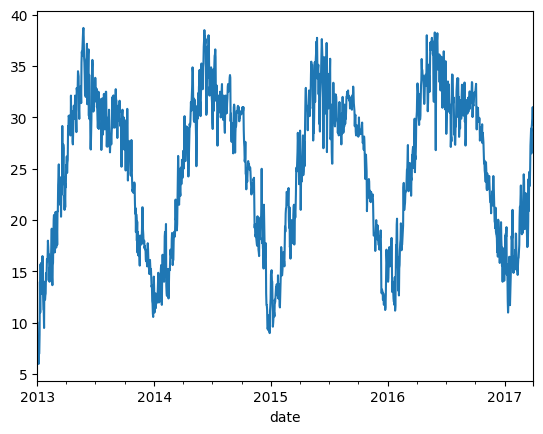

In [14]:
tseries.plot()

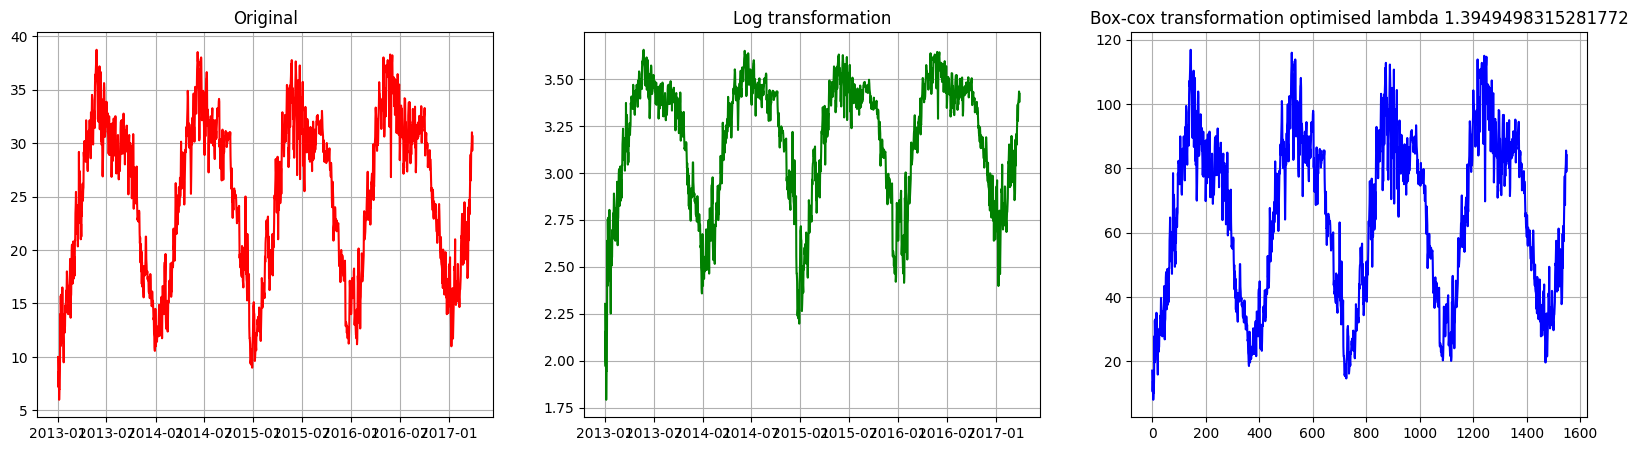

In [15]:
# Visualization of the results
fig,axes = plt.subplots(1,3,figsize=(20,5))
axes[0].grid()
axes[0].plot(tseries,color='red')
axes[0].set_title('Original')

axes[1].plot(tseries_log,color='green')
axes[1].grid()
axes[1].set_title('Log transformation')

axes[2].plot(tseries_box_cox_auto,color='blue')
axes[2].grid()
axes[2].set_title('Box-cox transformation optimised lambda '+str(opt_lambda))

plt.show()

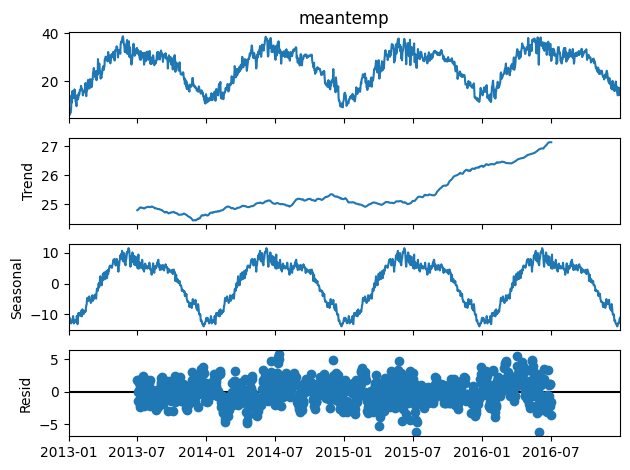

In [67]:
decompose_data_additive = seasonal_decompose(train_data['meantemp'], model='additive', period=365)

decompose_data_additive.plot()
plt.show()

In [68]:
decompose_data_trend = decompose_data_additive.trend
seasonal_adjusted = train_data['meantemp'] - decompose_data_additive.seasonal


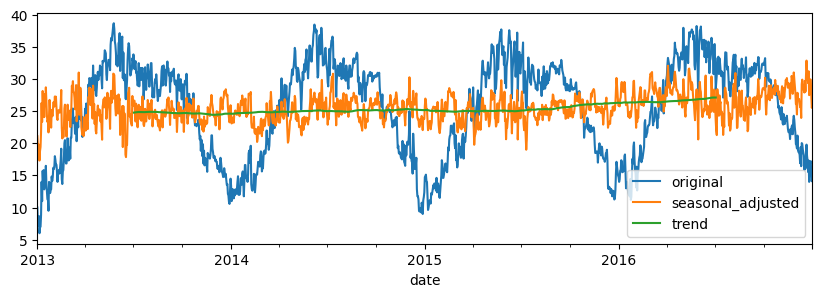

In [69]:
plt.figure(figsize=(10,3))
train_data['meantemp'].plot(label='original')
seasonal_adjusted.plot(label='seasonal_adjusted')
decompose_data_trend.plot(label='trend')
plt.legend()
plt.show()

In [19]:
# FFT and Amplitude Spectrum
signal_meantemp = merged_data['meantemp']
Fs = 1 # sampling frequency, our unit of measure is "months" (Important!)


,Freq,Period,Power
0,0.002579,387.75,56523.084233


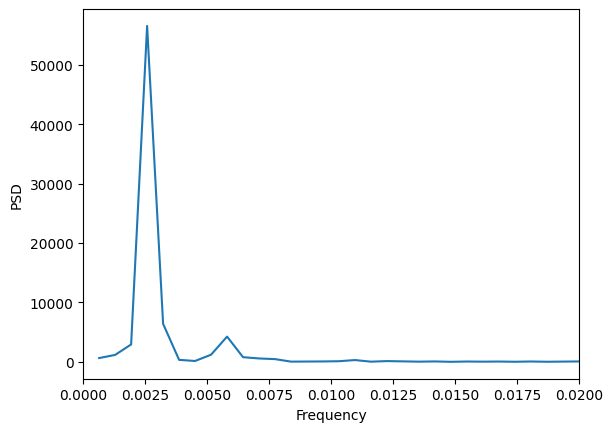

Frequency for the maximum value is:  0.0025789813023855577
Period (days/cycle):  387.75


In [66]:
# Frequency Analysis
signal_meantemp = merged_data['meantemp']
Fs = 1
f_per_density, Pxx_per_density = signal.periodogram(merged_data['meantemp'],Fs,detrend=False,window='boxcar',nfft=None,return_onesided=True,scaling='density')
f_per_density = f_per_density[1:]
Pxx_per_density = Pxx_per_density[1:]

plt.plot(f_per_density, Pxx_per_density)
plt.ylabel('PSD')
plt.xlim(0,0.02)
plt.xlabel('Frequency')


peaks = signal.find_peaks(Pxx_per_density[f_per_density >= 0], prominence=6000)[0]
peak_freq = f_per_density[peaks]
peak_power = Pxx_per_density[peaks]

table = {'Freq': peak_freq, 'Period': 1/peak_freq, 'Power': peak_power}
tab = pd.DataFrame(table)
display(tab)
plt.show()
temp = np.where(Pxx_per_density == Pxx_per_density.max())
print('Frequency for the maximum value is: ',float(f_per_density[temp]))
print('Period (days/cycle): ',float(1/f_per_density[temp]))